In [1]:
import os,sys
import ROOT
from ROOT import *
import pyplotlib.pyplot as plot

Welcome to JupyROOT 6.26/02


In [2]:
#list of input files

inputdir='pyplotlib/examples/input/'

os.listdir(inputdir)

['ttbar3LCR2018_TTW_MC_May13_v5.root',
 'ttbar3LCR2018_TTZ_MC_May13_v5.root',
 'ttbar3LCR2018_WZ_MC_May13_v5.root',
 'ttbar3LCR2018_Data_May13_v5.root',
 'ttbar3LCR2018_ZZ_MC_May13_v5.root',
 'ttbar3LCR2018_ttbar_MC_May13_v5.root',
 'ttbar3LCR2018_DY_MC_May13_v5.root']

In [3]:
samples=['DY','ZZ','WZ','ttbar','TTW','TTZ','Data']

plotname='mass12_all'

In [4]:
histo={}
for f_ in os.listdir(inputdir):
    for sample_ in samples:
        if(sample_ in f_):
            fname=TFile.Open(inputdir+f_,'READ')
            histo[sample_]=fname.Get(plotname)
            histo[sample_].SetDirectory(0)

In [5]:
histo

{'ttbar': <cppyy.gbl.TH1F object at 0x82686d0>,
 'TTW': <cppyy.gbl.TH1F object at 0x658e7f0>,
 'TTZ': <cppyy.gbl.TH1F object at 0x2683a80>,
 'WZ': <cppyy.gbl.TH1F object at 0x2500810>,
 'Data': <cppyy.gbl.TH1F object at 0x7cd98e0>,
 'ZZ': <cppyy.gbl.TH1F object at 0x824dbf0>,
 'DY': <cppyy.gbl.TH1F object at 0x7d53b20>}

In [6]:
dtlumi = 59.8*1000;
ttlumi = 28701360/88.29;
ttzlumi = 13280000/0.2432;
ttwlumi = 4911941/0.2149;
dylumi = 99717900/5765.0;  
wzlumi =10527550/5.052;
zzlumi =98613000/1.325;


## Matplotlib style plotting

- create a instance of the Plot Class
    - atleast provide analysisname+channel and year and analysisStage
    

- accumulate histogram by hist functionality
    - set different paramter by keyword such as color,label,scale(lumiscale),rebin, fill


- STILL NOT PLOTTED!


- Put some legend! 


- change xlabel,ylabel, xrange, y-range easily


- Now DRAW the figure invoking Draw() functionality


- savefig in pdf,png,svg etc format

Info in <TCanvas::Print>: pdf file example_1.pdf has been created


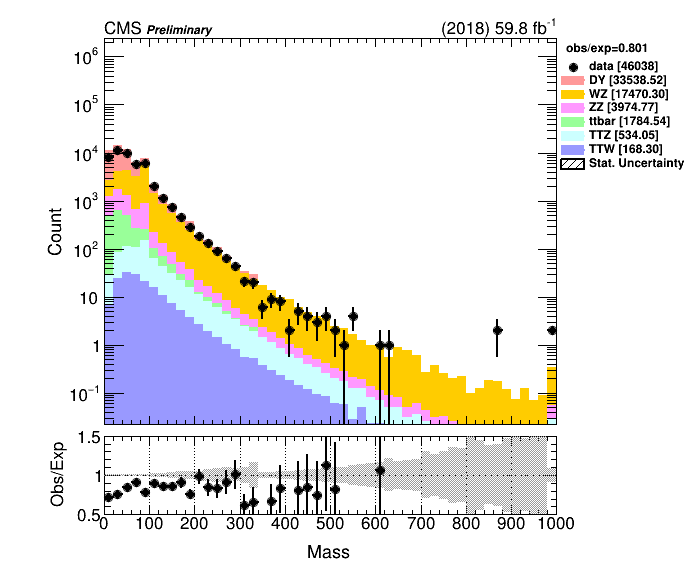

In [7]:
plt = plot.Plot('3L',2018,'PUB')

fillopt=True
plt.figure(ratiopad=True)
plt.hist(histo['DY'],color='kRed-9',label='DY',fill=fillopt,scale=(dtlumi/dylumi),rebin=20)
plt.hist(histo['ttbar'],color='kGreen-9',label='ttbar',fill=fillopt,scale=(dtlumi/ttlumi),rebin=20)
plt.hist(histo['WZ'],color='kOrange',label='WZ',fill=fillopt,scale=(dtlumi/wzlumi),rebin=20)
plt.hist(histo['ZZ'],color='kMagenta-9',label='ZZ',fill=fillopt,scale=(dtlumi/zzlumi),rebin=20)
plt.hist(histo['TTW'],color='kBlue-9',label='TTW',fill=fillopt,scale=(dtlumi/ttwlumi),rebin=20)
plt.hist(histo['TTZ'],color='kCyan-10',label='TTZ',fill=fillopt,scale=(dtlumi/ttzlumi),rebin=20)
plt.hist(histo['Data'],color='kBlack',label='data',fill=fillopt,tag='data',rebin=20)
plt.legend(loc='outside',fontsize=0.03)
plt.ylabel('Count')
plt.xlabel('Mass')
plt.ylim([0.1,1e6])
plt.Draw('stack',plotdata=True)
plt.savefig('example_1.pdf')

## Easy Custom Rebinning 

- Easy custom binning by providing a list of binrange and binwidth to ```rebin``` option
- Easy change of CMS Label: for example preliminary to Private Work

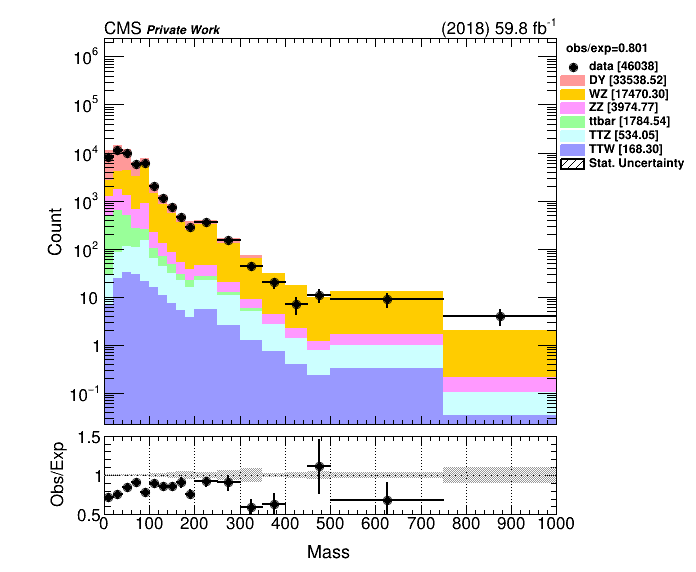

In [8]:
plt = plot.Plot('3L',2018,'Private Work')

fillopt=True

rebin_ = list(range(0,200,20))+ list(range(200,500,50))+list(range(500,1100,250))

plt.figure(ratiopad=True)
plt.hist(histo['DY'],color='kRed-9',label='DY',fill=fillopt,scale=(dtlumi/dylumi),rebin=rebin_)
plt.hist(histo['ttbar'],color='kGreen-9',label='ttbar',fill=fillopt,scale=(dtlumi/ttlumi),rebin=rebin_)
plt.hist(histo['WZ'],color='kOrange',label='WZ',fill=fillopt,scale=(dtlumi/wzlumi),rebin=rebin_)
plt.hist(histo['ZZ'],color='kMagenta-9',label='ZZ',fill=fillopt,scale=(dtlumi/zzlumi),rebin=rebin_)
plt.hist(histo['TTW'],color='kBlue-9',label='TTW',fill=fillopt,scale=(dtlumi/ttwlumi),rebin=rebin_)
plt.hist(histo['TTZ'],color='kCyan-10',label='TTZ',fill=fillopt,scale=(dtlumi/ttzlumi),rebin=rebin_)
plt.hist(histo['Data'],color='kBlack',label='data',fill=fillopt,tag='data',rebin=rebin_)

plt.legend(loc='outside',fontsize=0.03,style='f')
plt.ylabel('Count')
plt.xlabel('Mass')
plt.ylim([0.1,1e6])
plt.Draw('stack',plotdata=True)
#plt.savefig('pyplotlib/examples/example_2.pdf')

## Interested in Overlay?
- no data stack
- no ratio pad
- shape study( with or without normalizing)

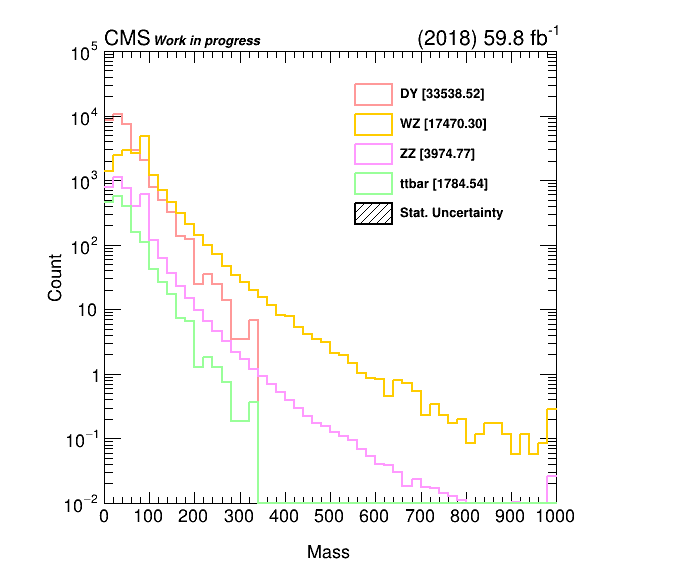

In [51]:
plt = plot.Plot('3L',2018,'WIP')

fillopt=False
den_opt=False
#rebin_ = list(range(0,200,20))+ list(range(200,500,50))+list(range(500,1100,250))
rebin_=20

plt.figure(ratiopad=False)
plt.hist(histo['DY'],color='kRed-9',label='DY',fill=fillopt,scale=(dtlumi/dylumi),rebin=rebin_,density=den_opt)
plt.hist(histo['ttbar'],color='kGreen-9',label='ttbar',fill=fillopt,scale=(dtlumi/ttlumi),rebin=rebin_,density=den_opt)
plt.hist(histo['WZ'],color='kOrange',label='WZ',fill=fillopt,scale=(dtlumi/wzlumi),rebin=rebin_,density=den_opt)
plt.hist(histo['ZZ'],color='kMagenta-9',label='ZZ',fill=fillopt,scale=(dtlumi/zzlumi),rebin=rebin_,density=den_opt)
#plt.hist(histo['TTW'],color='kBlue-9',label='TTW',fill=fillopt,scale=(dtlumi/ttwlumi),rebin=rebin_,density=den_opt)
#plt.hist(histo['TTZ'],color='kCyan-10',label='TTZ',fill=fillopt,scale=(dtlumi/ttzlumi),rebin=rebin_,density=den_opt)

plt.legend(loc='inside',fontsize=0.025,style='f')
plt.ylabel('Count')
plt.xlabel('Mass')
plt.xlim([0,1000])
plt.ylim([0.01,1e5])
plt.Draw(mode='overlay',style='HIST')
#plt.savefig('pyplotlib/examples/example_2.pdf')

In [54]:
#checkout histograms
# [label,tag,nevent,eventError,histogram_pointer]
plt.histogram

[['DY',
  'MC',
  33538.51943588257,
  1177.234539601214,
 ['WZ',
  'MC',
  17470.303221821785,
  0.6425439383959263,
 ['ZZ',
  'MC',
  3974.770559685072,
  0.0014359162147767506,
 ['ttbar',
  'MC',
  1784.5417829751968,
  3.3329492575478494,